## Business Overview

### What is Lending Club?

Lending Clud is marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return.

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may leao a financial loss for the company.


## Problem Statment

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

## Data Understanding

There are broadly three types of variables-
1. Those who are related to applicant i.e. Demographic Information
    - emp_title
    - emp_length
    - home_ownership
    - annual_inc
    - verification_status
    - addr_state
    - zip_code
    - title
    - purpose
    - desc
    - url
    - annual_inc_joint
    - id
    - verified_status_joint
2. Loan Characteristics
    - loan_amnt
    - funded_amnt
    - funded_amnt_inv
    - int_rate
    - loan_status
    - grade
    - subgrade
    - dti
    - dti_joint
    - issue_d
    - term
    - installment
3. Customer Behaviour Variables i.e. those are generated after loan is approved.
    - delinq_2yrs
    - earliest_cr_line
    - inq_last_6mths
    - inq_last_12m
    - open_acc
    - pub_rec
    - revol_bal
    - revol_util
    - total_acc
    - out_prncp
    - out_prncp_inv
    - total_pymnt
    - total_pymnt_inv
    - total_rec_prncp
    - total_rec_int
    - total_rec_late_fee
    - recoveries
    - collection_recovery_fee
    - last_pymnt_d
    - last_pymnt_amnt
    - last_credit_pull_d
    - application_type

### Most Important Features:
- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

- funded_amnt: The total amount committed to that loan at that point in time.

- funded_amnt_inv: The total amount committed by investors for that loan at that point in time.

- term: The number of payments on the loan. Values are in months and can be either 36 or 60.

- int_rate:Interest Rate on the loan

- installment: The monthly payment owed by the borrower if the loan originates.

- grade:LC assigned loan grade

- sub_grade: LC assigned loan subgrade

- emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

- home_ownership: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

- annual_inc: The self-reported annual income provided by the borrower during registration.

- verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified

- Month: The month which the loan was funded

- loan_status: Current status of the loan

- purpose: A category provided by the borrower for the loan request. 

- addr_state: The state provided by the borrower in the loan application

- dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


### Importing Libraries and read data from CSV files

##### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings  #It used to suppress warnings
warnings.filterwarnings("ignore")    #It is used to suppress warnings

##### Read data from CSV file using read_csv() of pandas

In [2]:
df = pd.read_csv('loan.csv')
df.shape

(39717, 111)

## Data Cleaning
##### We can see that we have 39717 rows and 111 columns in a given dataset. Hence, we should check its columns and see which columns are relevant for our predictions. But before that we need to clean the data like remove unwanted columns or rows, remove null values. The aim is to have clean data before starting with our analysis

In [3]:
pd.options.display.min_rows = 115 #As there are more columns, so we won't see all columns in results.
                                  #Using this setting, we can see 115 results rows  

In [4]:
#Print information about dataframe
df.info(max_cols = 111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

#### Removing Not related data for our predictions. Here, we have removed data related to Customer Behavioural data as it is generated after Loan is approved

In [5]:
#Removing Customer Behavioural data as these data generated after loan is approved.
#Hence, it is not useful to find correct pattern as well as insights.
df.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','inq_last_12m','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv',
'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
'last_credit_pull_d','application_type'], axis=1, inplace=True)

In [6]:
#Print information about dataframe
df.info(max_cols = 111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                  

In [7]:
#Checking percentage of missing values
null_perc = round(100*(df.isnull().sum()/len(df.index)), 2)
null_perc[ null_perc > 0 ]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util        

#### Removing columns which has more than 30% null values in it as it won't be useful in determining any insights and patterns

In [8]:
#Removing columns which has more than 30% null values in it as it won't be useful in determining any insights and patterns
df.drop(null_perc[ null_perc > 40 ].index, axis=1, inplace=True)

In [9]:
#Print information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### As we can see, there are still columns which won't be useful in our anlysis. Hence, we will remove unwanted columns from our dataset.

In [10]:
df.drop(['id','member_id','emp_title','url','desc','title','zip_code'], axis=1, inplace=True)

In [11]:
#Print information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

#### This is used to check unique values in columns.If columns are having only 1 value then it is not really useful in doing analyis

In [12]:
#This is used to check unique values in columns. 
#If columns are having only 1 value then it is not really useful in doing analyis
df.nunique(axis=0).sort_values()

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv                8205
installment                   15383
dtype: int64

#### As we can see, there are  columns containing only 1 value so such kind columns won't be useful in our anlysis. Hence, we will remove unwanted columns from our dataset.

In [13]:
df.drop(['tax_liens','pymnt_plan','collections_12_mths_ex_med','policy_code','initial_list_status','chargeoff_within_12_mths',
         'delinq_amnt','acc_now_delinq'], axis=1, inplace=True)

In [14]:
#Print information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

#### The column pub_rec_bankrupties contains some NULL values. Hence, instead data imputation, we will remove rows where we find NULL values.

In [15]:
df = df[~df.pub_rec_bankruptcies.isnull()]

In [16]:
#Print information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39020 entries, 0 to 39680
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39020 non-null  int64  
 1   funded_amnt           39020 non-null  int64  
 2   funded_amnt_inv       39020 non-null  float64
 3   term                  39020 non-null  object 
 4   int_rate              39020 non-null  object 
 5   installment           39020 non-null  float64
 6   grade                 39020 non-null  object 
 7   sub_grade             39020 non-null  object 
 8   emp_length            37945 non-null  object 
 9   home_ownership        39020 non-null  object 
 10  annual_inc            39020 non-null  float64
 11  verification_status   39020 non-null  object 
 12  issue_d               39020 non-null  object 
 13  loan_status           39020 non-null  object 
 14  purpose               39020 non-null  object 
 15  addr_state         

#### Now, we have 18 columns where we have values. As we can see, we have loan status field in a given data set.

In [17]:
#Return a Series containing counts of unique values.
df.loan_status.value_counts()

Fully Paid     32371
Charged Off     5509
Current         1140
Name: loan_status, dtype: int64

#### Here, we can see 3 Loan Status such as Fully Paid, Charged Off and Current. By looking into Current Loan Status, we can't extract meaningful data as the borrower is paying loan regularly and they haven't paid entire loan or defaulted loan yet. So as of now, we should remove data of borrower whose Loan Status is Current and give focus on Loan Status like Fully Paid and Charged Off

In [18]:
df = df[df.loan_status != 'Current']
df.shape

(37880, 18)

In [19]:
#Print information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37880 entries, 0 to 39680
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37880 non-null  int64  
 1   funded_amnt           37880 non-null  int64  
 2   funded_amnt_inv       37880 non-null  float64
 3   term                  37880 non-null  object 
 4   int_rate              37880 non-null  object 
 5   installment           37880 non-null  float64
 6   grade                 37880 non-null  object 
 7   sub_grade             37880 non-null  object 
 8   emp_length            36847 non-null  object 
 9   home_ownership        37880 non-null  object 
 10  annual_inc            37880 non-null  float64
 11  verification_status   37880 non-null  object 
 12  issue_d               37880 non-null  object 
 13  loan_status           37880 non-null  object 
 14  purpose               37880 non-null  object 
 15  addr_state         

#### Here, we are checking emp_length column which is nothing but Employement Length in years. Suppose, if borrower is not provided with emp_length, then such Loan Request should be rejected because getting Loan from any Lending Companies, Employment/Job is very important feature. Hence, we should remove records of emp_length for NULL values.


In [20]:
df = df[~df.emp_length.isnull()]
df.shape

(36847, 18)

In [21]:
#Print information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36847 non-null  int64  
 1   funded_amnt           36847 non-null  int64  
 2   funded_amnt_inv       36847 non-null  float64
 3   term                  36847 non-null  object 
 4   int_rate              36847 non-null  object 
 5   installment           36847 non-null  float64
 6   grade                 36847 non-null  object 
 7   sub_grade             36847 non-null  object 
 8   emp_length            36847 non-null  object 
 9   home_ownership        36847 non-null  object 
 10  annual_inc            36847 non-null  float64
 11  verification_status   36847 non-null  object 
 12  issue_d               36847 non-null  object 
 13  loan_status           36847 non-null  object 
 14  purpose               36847 non-null  object 
 15  addr_state         

#### Here, we have removed percentage sign from Interest Rate

In [22]:
#Here, we have removed percentage sign from Interest Rate
df['int_rate']=df['int_rate'].str.rstrip('%')
df['int_rate']=df['int_rate'].apply(pd.to_numeric)

#### Here, we extract Year and Month from Issue Date

In [23]:
#Here, we extract Year and Month from Issue Date
df['issue_date']=pd.to_datetime(df.issue_d, format='%b-%y')
df['year'] = pd.DatetimeIndex(df['issue_date']).year
df['month'] = df.issue_date.dt.month_name(locale='English')

In [24]:
#This head() returns the first n rows for the object based on position.
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_date,year,month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,2011-12-01,2011,December
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0,2011-12-01,2011,December
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0,2011-12-01,2011,December
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0,2011-12-01,2011,December
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0,2011-12-01,2011,December


#### After completing data cleaning stage, now we have clean data set where we don't have any null values as well as unique values. As part of data cleaning process, we have removed unwanted columns. We have also removed columns which contains only NULL values. Also, we have filtered out data based on loan_status. Now, we have data which will be useful for getting insights and patterns.

## Univariate Analysis

#### Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

##### Here, we are performing univariate analysis for the below variables
   - Loan Amount
   - Term
   - Interest Rate
   - Employee Length
   - Home Ownership
   - Annual Income
   - Installment Per Month
   - Verification Status
   - Year Month
   - Loan Status
   - Purpose of Loan
   - Address State
   - Grade


    

#### Loan Amount

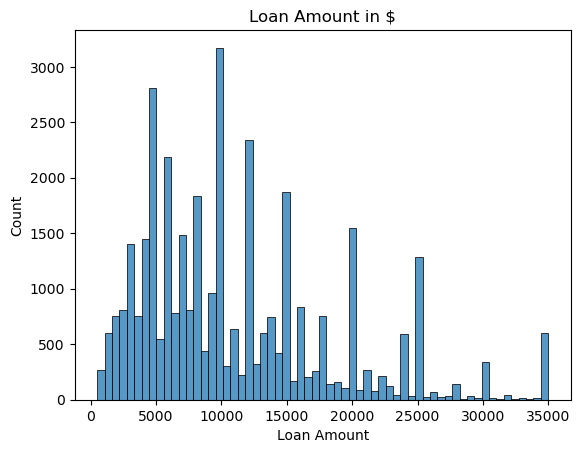

In [25]:
sns.histplot(x='loan_amnt', data=df).set(title = 'Loan Amount in $', xlabel='Loan Amount')
plt.show()

#### Insights
1. Maximum loan amount is given by company is \$35000. 
2. Less people are requesting high loan amount.

#### Loan Term

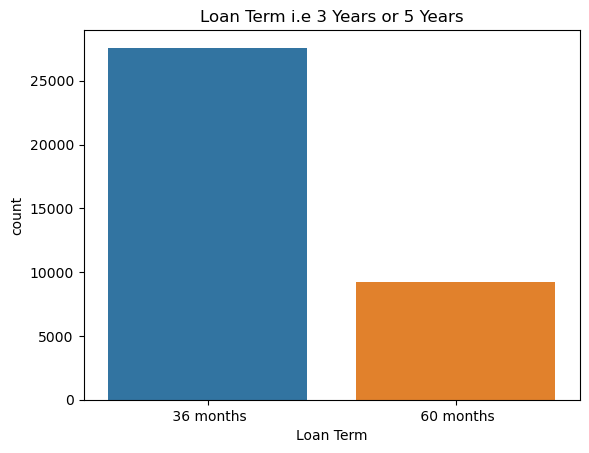

In [26]:
sns.countplot(df.term).set(title='Loan Term i.e 3 Years or 5 Years', xlabel='Loan Term')
plt.show()

### Insights
1. Most of the loans are shorter, with a term of 36 months.

#### Interest Rate

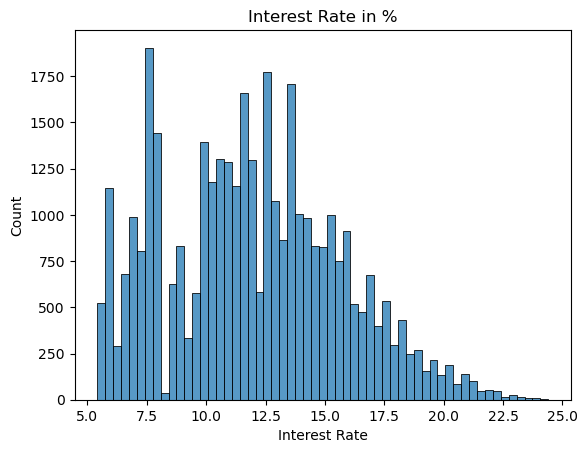

In [27]:
sns.histplot(df.int_rate).set(title='Interest Rate in %', xlabel="Interest Rate")
plt.show()

### Insights
1. Maximum Interest Rate is 25% and lowest Interest Rate is approx.5.5%. 
2. Most no. of borrowers are getting Interest Rate between 7.5% to apporx. 14%.

#### Employee Length/ Employee Experience

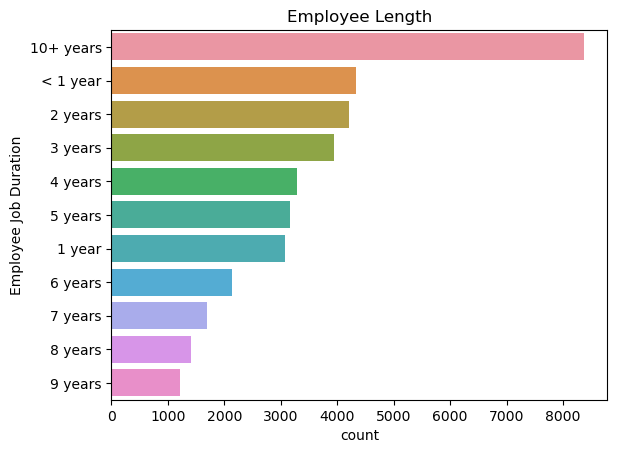

In [28]:
sns.countplot(y= df.emp_length, order = df['emp_length'].value_counts().index).set(title='Employee Length',ylabel ='Employee Job Duration')
plt.show()

### Insights
1. People are taking less loan as Employee Length increases.
2. People having less than 1 year experience, are likely taking more loans as they don't have any responsibilty

#### Home Ownership

In [29]:
# Changing 'None' value to 'Other' in Home Ownership column 
df['home_ownership'].replace(to_replace=['NONE'], value=['OTHER'], inplace=True)

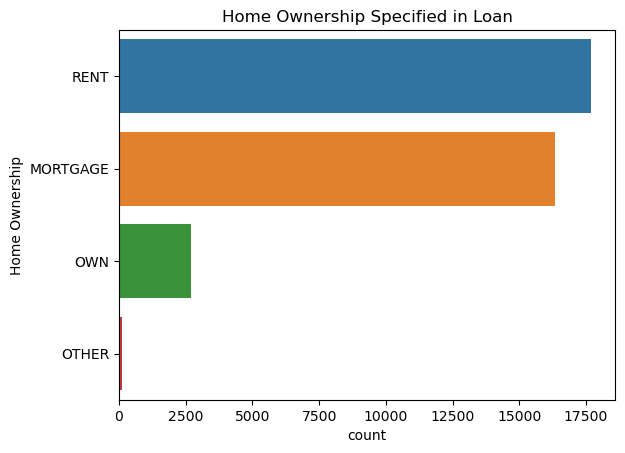

In [30]:
sns.countplot(y= df.home_ownership, order = df['home_ownership'].value_counts().index).set(title='Home Ownership Specified in Loan',ylabel ='Home Ownership')
plt.show()

### Insights
1. Most Borrowers either have existing mortgages or are renting their home.
2. Borrower ar getting extra money by renting or mortgaing their home.
3. We can say, by Renting or Morgaging homes, they are getting extra income.

#### Annual Income

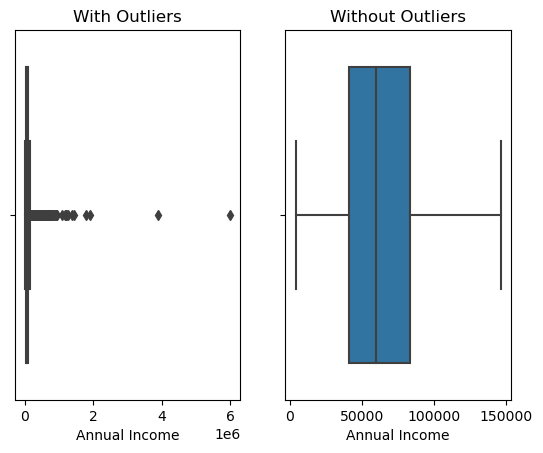

In [31]:
fig, ax =plt.subplots(1,2)
sns.boxplot(df.annual_inc, ax=ax[0]).set(title = 'With Outliers', xlabel = "Annual Income")
sns.boxplot(df.annual_inc, showfliers=False, ax=ax[1]).set(title = 'Without Outliers', xlabel = "Annual Income")
fig.show()

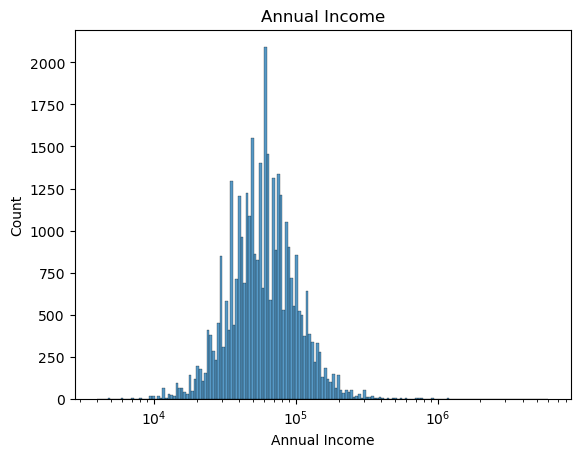

In [32]:
sns.histplot(df.annual_inc, log_scale=True).set(title="Annual Income", xlabel="Annual Income")
plt.show()

### Insights
<P> After checking Annual Income of Borrower, we found that the distribution is highly postively skewed, from zero income to an income of \$6 million (which appears to be an outlier). The median income is $60,000.</P>

#### Installment

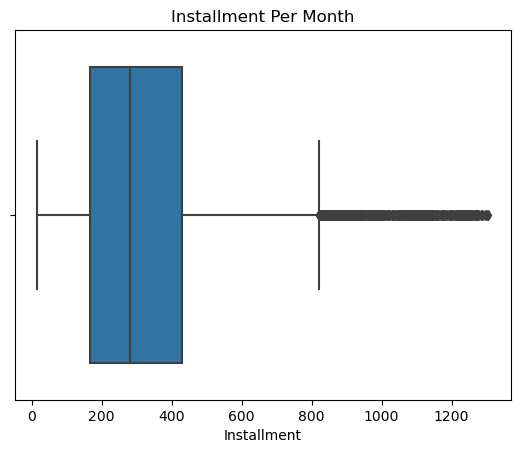

In [33]:
sns.boxplot(df.installment).set(title = 'Installment Per Month', xlabel = "Installment")
plt.show()

#### Statistics information about installment

In [34]:
df.installment.describe()

count    36847.000000
mean       324.694599
std        208.886154
min         16.080000
25%        167.565000
50%        280.000000
75%        428.975000
max       1305.190000
Name: installment, dtype: float64

### Insights
<P> After checking Installment per Month of Borrowers, we found that installment ranges from \$15 to \$1305 per month. The mean is \$324. We can see outliers on the right tail.</P>

#### Verification Status

#### Finding Verification Status Percentage

In [35]:
#Finding Verification Status Percentage
percent_verification=df.verification_status.value_counts()/len(df)*100
percent_verification=percent_verification.rename_axis('Verification Status').reset_index(name='Percent')
percent_verification

,Verification Status,Percent
0,Not Verified,42.288382
1,Verified,31.945613
2,Source Verified,25.766005


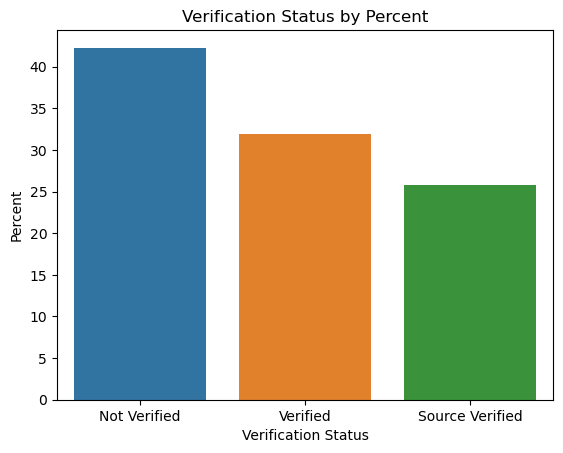

In [36]:
sns.barplot(x="Verification Status", y="Percent", data=percent_verification).set(title="Verification Status by Percent")
plt.show()

### Insights
1. Most of the income has verified including Source and Verified but 42% were not verified.

#### Year

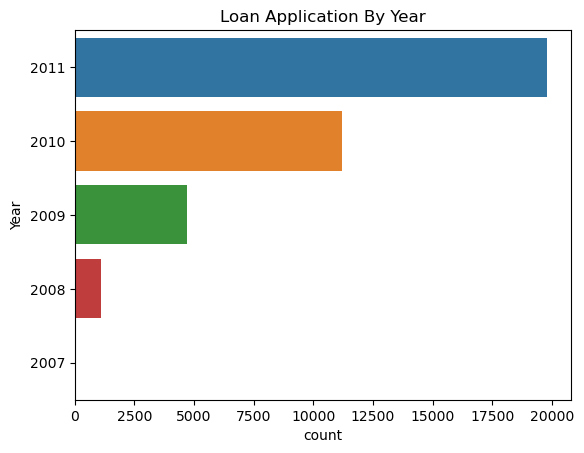

In [37]:
sns.countplot(y= df.year, order = df['year'].value_counts().index).set(title="Loan Application By Year",ylabel ='Year')
plt.show()

#### Insights
1. We can lot of loan request in year 2010 and 2011.
2. It seems like loan requests were increased after easing of 2008 recession which lasted for 18-24 months.

#### Month

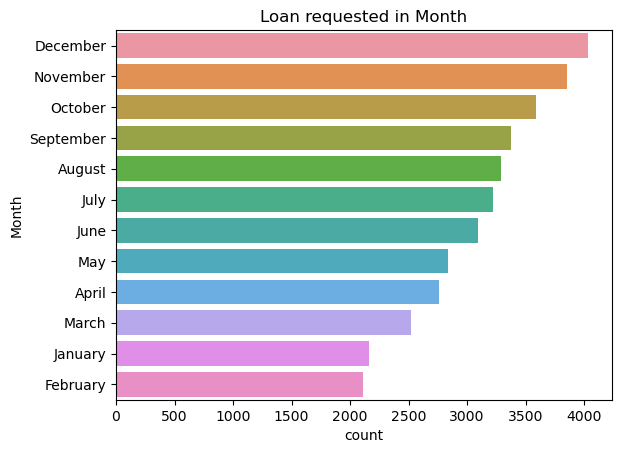

In [38]:
sns.countplot(y= df.month, order = df['month'].value_counts().index).set(ylabel ='Month', title='Loan requested in Month')
plt.show()

### Insights
1. We can see increase in loans after February Month. 
2. Maximum loans were taken in December month

#### Loan Status

#### Finding percentage for Loan Status

In [39]:
#Finding percentage for Loan Status
percent_loan=df.loan_status.value_counts()/len(df)*100
percent_loan=percent_loan.rename_axis('Loan Status').reset_index(name='Percent')
percent_loan

,Loan Status,Percent
0,Fully Paid,85.667761
1,Charged Off,14.332239


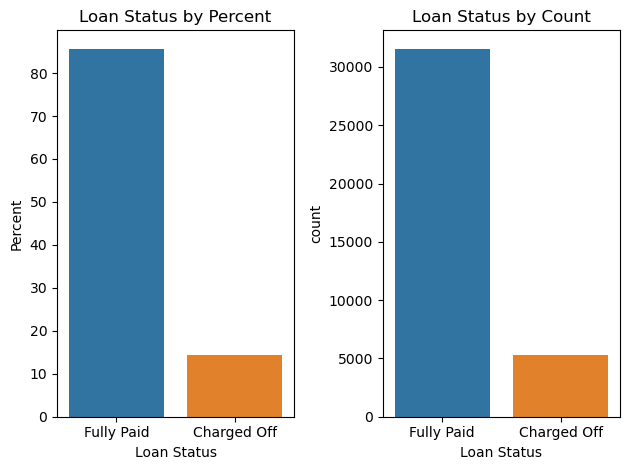

In [40]:
fig, ax =plt.subplots(1,2)
sns.barplot(x="Loan Status", y="Percent", data=percent_loan, ax=ax[0]).set(title="Loan Status by Percent")
sns.countplot(x= df.loan_status, ax=ax[1]).set(xlabel ='Loan Status', title="Loan Status by Count")
fig.tight_layout()
fig.show()

### Insights
1. Aorund 85% of borrower had fully paid loan but 15% of borrower defaulted their loan.

#### Purpose

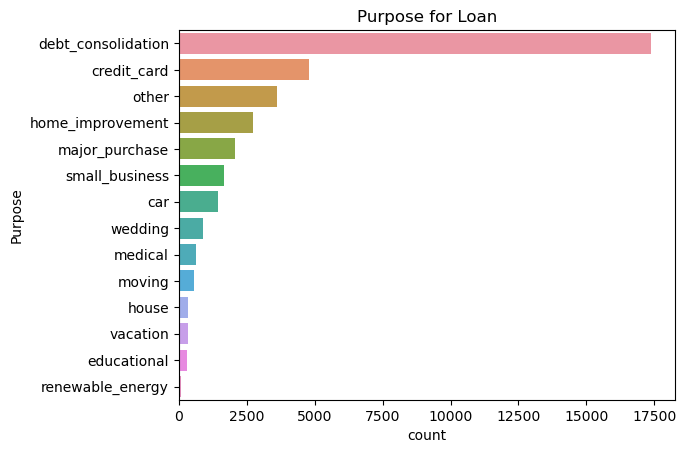

In [41]:
sns.countplot(y= df.purpose, order = df['purpose'].value_counts().index).set(ylabel ='Purpose', title="Purpose for Loan")
plt.show()

### Insights
1. More borrowers are taking loan for Debt Consolidation. 
2. Other significant purpose is Credit Card. 
3. There are very few borrowers are taking loan for renewable_energy.

#### Address State specified in Loan Request

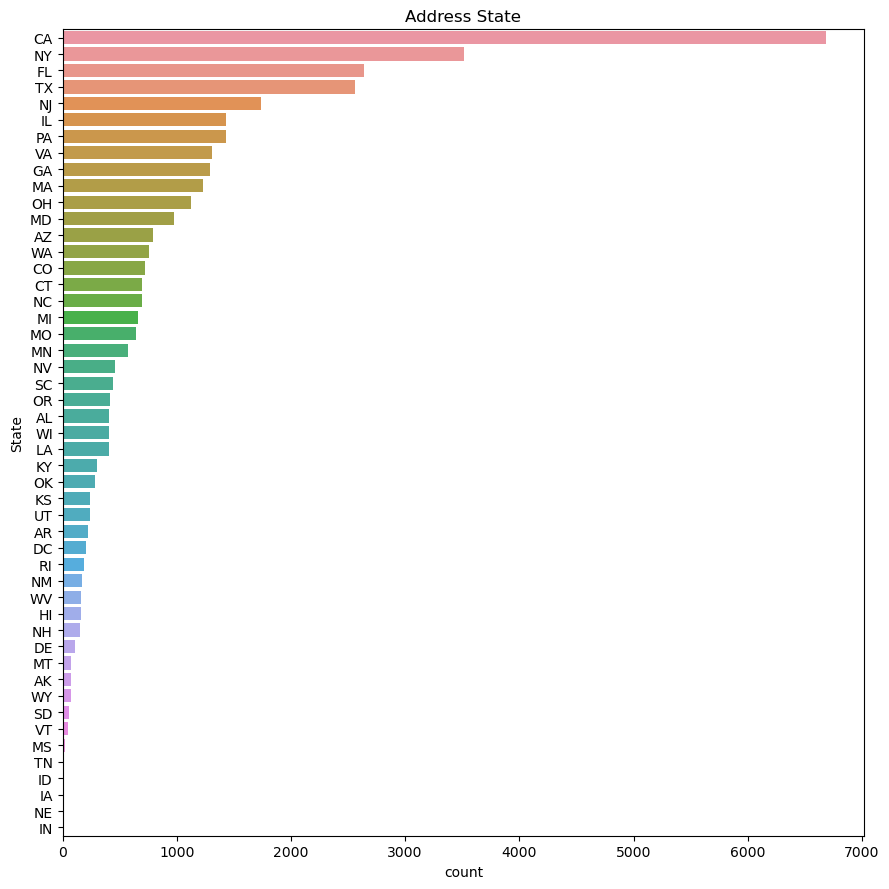

In [42]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.countplot(ax=ax,y= df.addr_state, order = df['addr_state'].value_counts().index).set(ylabel ='State', title="Address State")
plt.tight_layout()
plt.show()

### Insights
<P> Most of borrowers are coming from CA State</P>

#### Grade

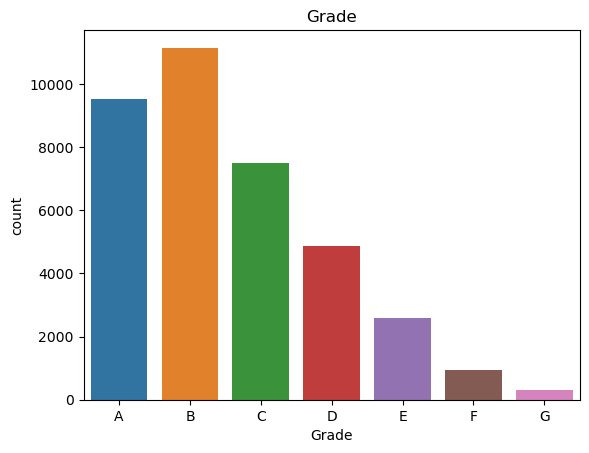

In [43]:
sns.countplot(x= df.grade, order =['A','B','C','D','E','F','G']).set(xlabel ='Grade', title="Grade")
plt.show()

### Insights
1. Most of the loans are graded B.
2. Very few loans are graded G. 
3. Loan amounts for the high-grade loans tend to be smaller than the low-graded loans.

## Bivariate Analysis

#### It is a methodical statistical technique applied to a pair of variables (features/ attributes) of data to determine the empirical relationship between them. In order words, it is meant to determine any concurrent relations (usually over and above a simple correlation analysis).

#### Loan vs Purpose

In [44]:
purpose_loan=round(pd.crosstab(df.loan_status,df.purpose, normalize=True)*100,2)
purpose_loan

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,0.41,1.36,7.13,0.13,0.87,0.16,0.56,0.27,0.22,1.58,0.05,1.20,0.14,0.24
Fully Paid,3.47,11.67,40.05,0.68,6.56,0.79,5.03,1.48,1.25,8.21,0.21,3.29,0.79,2.18


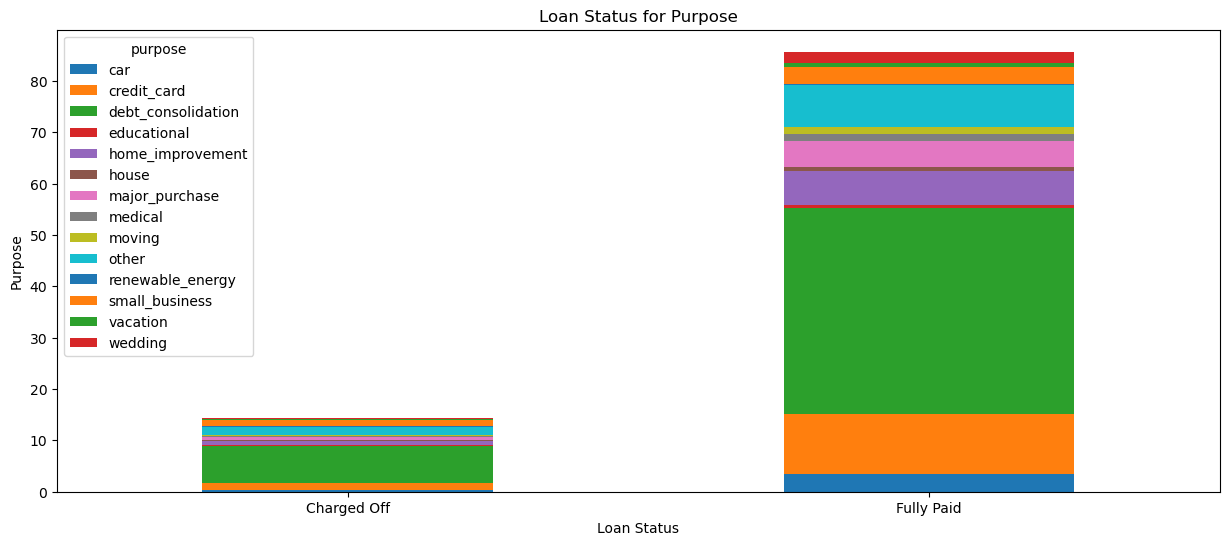

In [45]:
purpose_loan.plot(kind='bar',stacked=True,figsize=(15,6))
plt.title("Loan Status for Purpose")
plt.xlabel('Loan Status')
plt.ylabel('Purpose')
plt.xticks(rotation=0)
plt.show()

#### Insights
1. As we can see good ratio between loans were taken for debt_consolidation, credti_card, card w.r.t Fully Paid and Charged Off

#### Loan Status vs Year

In [46]:
year_loan_status=round(pd.crosstab(df.loan_status,df.year, normalize=True)*100,2)
year_loan_status

year,2007,2008,2009,2010,2011
loan_status,,,,,
Charged Off,0.01,0.47,1.61,3.83,8.42
Fully Paid,0.01,2.55,11.18,26.60,45.32


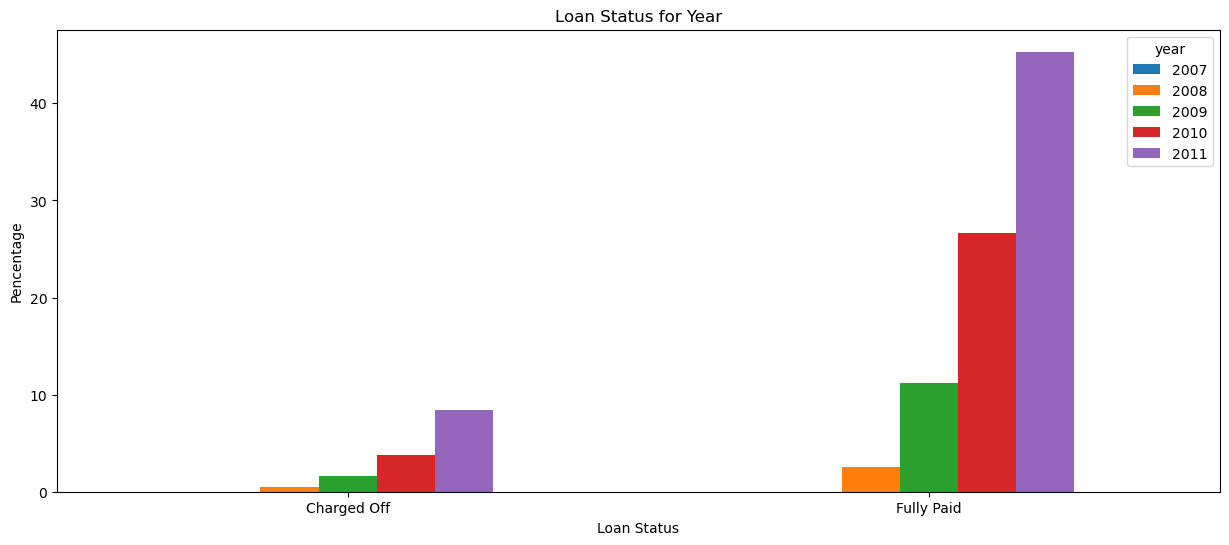

In [47]:
year_loan_status.plot(kind='bar',figsize=(15,6))
plt.title("Loan Status for Year")
plt.xlabel('Loan Status')
plt.ylabel('Pencentage')
plt.xticks(rotation=0)
plt.show()

#### Insights
1. By seeing Loan Status and Year, we can't see more relatable pattern here. But notable, we can see loan requests were increased after 2009.

#### Loan Status vs Grade

In [48]:
grade_loan_status=round(pd.crosstab(df.loan_status,df.grade, normalize=True)*100,2)
grade_loan_status

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,1.50,3.60,3.40,2.86,1.87,0.83,0.27
Fully Paid,24.33,26.66,16.91,10.36,5.14,1.73,0.53


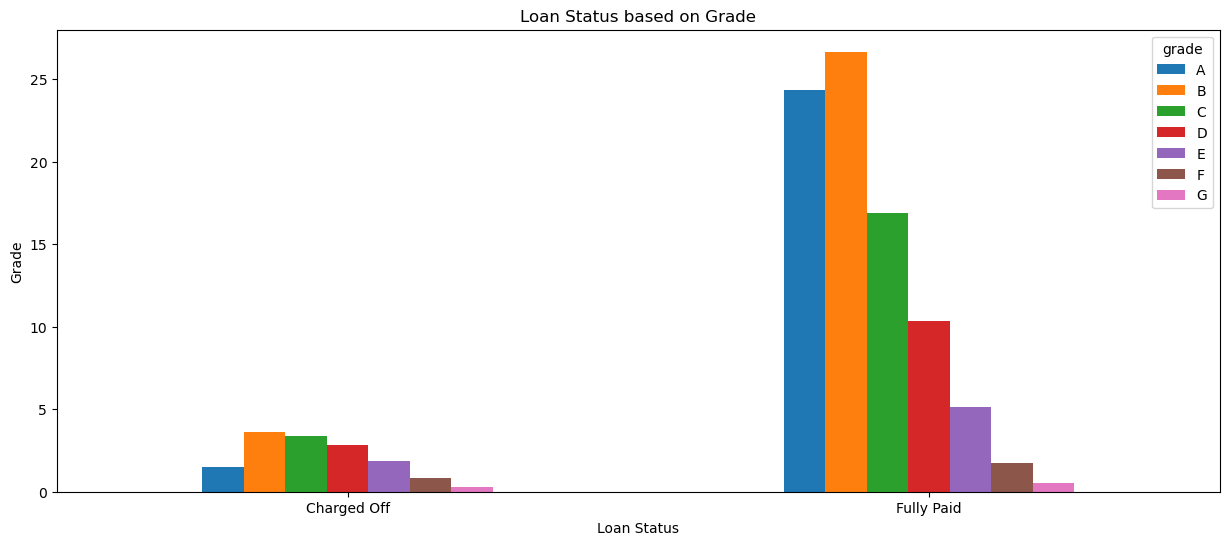

In [49]:
grade_loan_status.plot(kind='bar',figsize=(15,6))
plt.title("Loan Status based on Grade")
plt.xlabel('Loan Status')
plt.ylabel('Grade')
plt.xticks(rotation=0)
plt.show()

#### Insights
1. We can see that borrowers defaulted their loan for Higher Loan Grade.

#### Loan Status vs State

In [50]:
loan_state=round(pd.crosstab(df.addr_state,df.loan_status, normalize=True)*100,2)
loan_state

loan_status,Charged Off,Fully Paid
addr_state,,
AK,0.04,0.16
AL,0.14,0.98
AR,0.07,0.54
AZ,0.31,1.85
CA,2.85,15.29
CO,0.24,1.72
CT,0.24,1.66
DC,0.04,0.53
DE,0.03,0.26


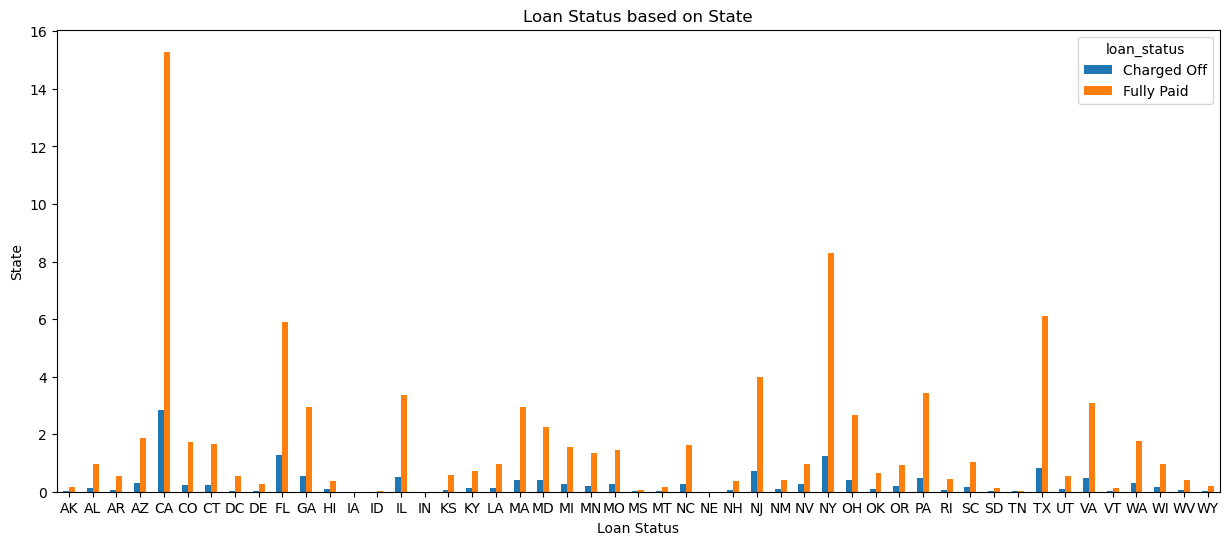

In [51]:
loan_state.plot(kind='bar',figsize=(15,6))
plt.title("Loan Status based on State")
plt.xlabel('Loan Status')
plt.ylabel('State')
plt.xticks(rotation=0)
plt.show()

#### Insights
1. We can see more Loan Requests from Metro Cities.

#### Loan Status vs Verification Status

In [52]:
loan_verification=round(pd.crosstab(df.loan_status,df.verification_status, normalize=True)*100,2)
loan_verification

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,5.24,3.79,5.30
Fully Paid,37.05,21.98,26.64


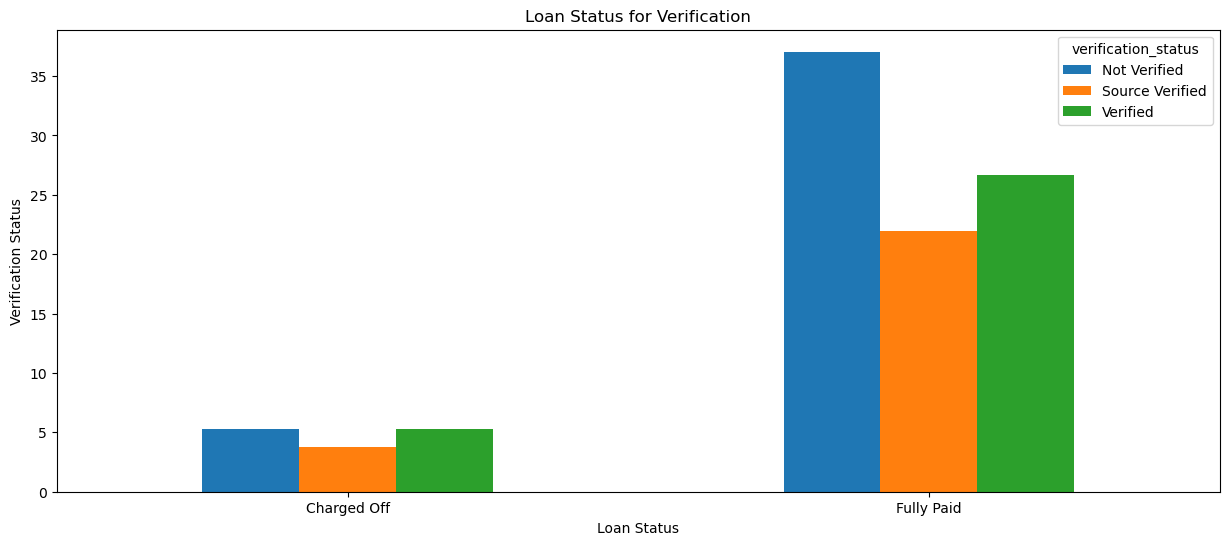

In [53]:
loan_verification.plot(kind='bar',figsize=(15,6))
plt.title("Loan Status for Verification")
plt.xlabel('Loan Status')
plt.ylabel('Verification Status')
plt.xticks(rotation=0)
plt.show()

#### Insights
1. We can see more Charged Off for Verified status as compare to Not Verified Status.

#### Loan Status vs Home Ownership

In [54]:
loan_ownership=round(pd.crosstab(df.loan_status,df.home_ownership, normalize=True)*100,2)
loan_ownership

home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
Charged Off,5.97,0.05,1.05,7.27
Fully Paid,38.39,0.22,6.30,40.77


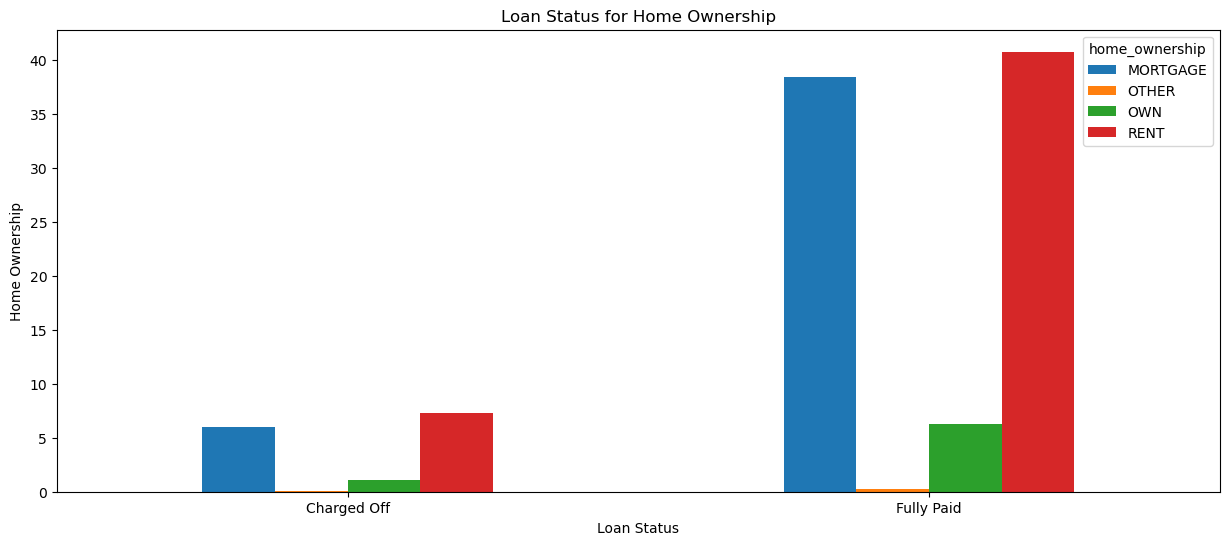

In [55]:
loan_ownership.plot(kind='bar',figsize=(15,6))
plt.title("Loan Status for Home Ownership")
plt.xlabel('Loan Status')
plt.ylabel('Home Ownership')
plt.xticks(rotation=0)
plt.show()

#### Insights
1. We can see more loan requests from borrowers who were renting or morgaging their homes to get extra income or pay their debts

#### Loan Status vs Employee Length

In [56]:
emp_loan_status=round(pd.crosstab(df.loan_status,df.emp_length, normalize=True)*100,2)
emp_loan_status

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
loan_status,,,,,,,,,,,
Charged Off,1.20,3.54,1.51,1.49,1.22,1.23,0.82,0.70,0.54,0.42,1.66
Fully Paid,7.15,19.18,9.91,9.23,7.73,7.35,4.98,3.88,3.28,2.86,10.12


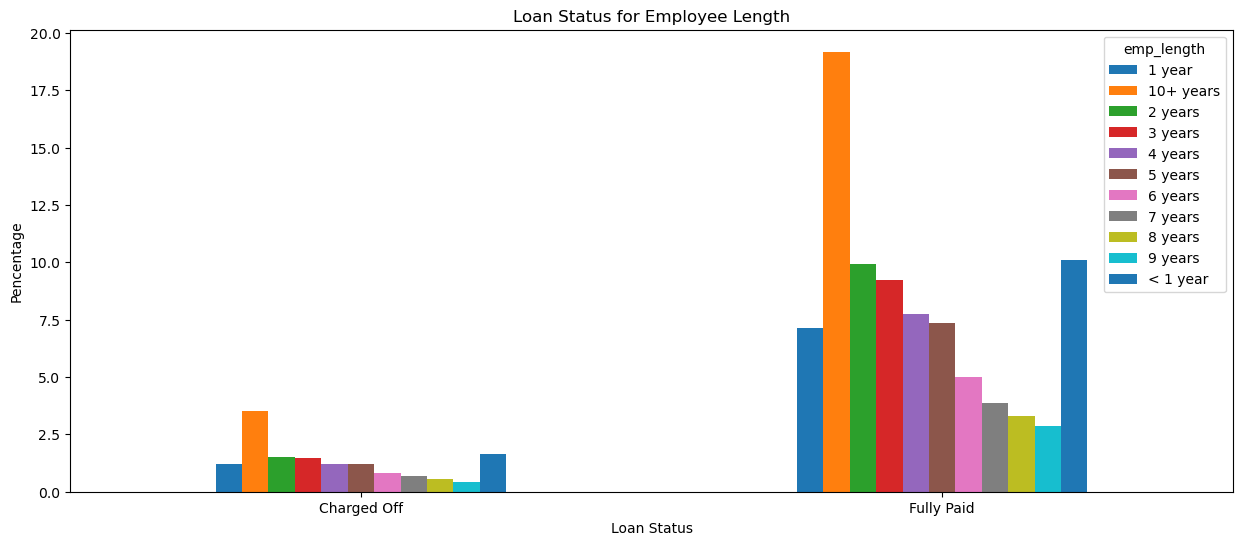

In [57]:
emp_loan_status.plot(kind='bar',figsize=(15,6))
plt.title("Loan Status for Employee Length")
plt.xlabel('Loan Status')
plt.ylabel('Pencentage')
plt.xticks(rotation=0)
plt.show()

#### Insights
1. Charged Off ratio increases with Employee length also we can see decrease for loan requests for higher employee length.

### Dervied Variables

#### Finding statistical information about annual_inc:

In [58]:
df.annual_inc.describe().apply(lambda x: format(x, 'f'))

count      36847.000000
mean       69404.481862
std        64027.473436
min         4000.000000
25%        41004.000000
50%        60000.000000
75%        83000.000000
max      6000000.000000
Name: annual_inc, dtype: object

#### Getting 90% quantile for annual_inc:

In [59]:
df.annual_inc.quantile(0.9)

116685.60000000003

#### Function for creating category for annual_inc based on statistical information

In [60]:
def income_cat(row):
    if (row.annual_inc>=4000) and (row.annual_inc<=41000):
        return 'LEVEL1'
    elif (row.annual_inc>41000) and (row.annual_inc<=60000):
        return 'LEVEL2'
    elif (row.annual_inc>60000) and (row.annual_inc<=83000):
        return 'LEVEL3'
    elif (row.annual_inc>83000) and (row.annual_inc<=116685):
        return 'LEVEL4'
    else:
        return 'LEVEL5'

In [61]:
df['Income_Category'] = df.apply(lambda row: income_cat(row), axis=1)

In [62]:
df['Income_Category'].value_counts()

LEVEL2    10542
LEVEL1     9199
LEVEL3     7923
LEVEL4     5498
LEVEL5     3685
Name: Income_Category, dtype: int64

#### Now, we have created Income_Category based on annual_inc.

#### Finding statistical information for dti:

In [63]:
df.dti.describe()

count    36847.000000
mean        13.330449
std          6.651565
min          0.000000
25%          8.210000
50%         13.420000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

#### Creating categories for dti:

In [64]:
def dti_category(row):  
    if (row<=8.21):
        return 'Low'
    elif (row>8.21) and (row<=13.42):
        return 'Medium'
    elif (row>13.42) and (row<=18.59):
        return 'High'
    else:
        return 'Very High'

df['dti_cat'] = df['dti'].apply(lambda x: dti_category(x))

In [65]:
df.dti_cat.value_counts()

High         9224
Low          9217
Medium       9209
Very High    9197
Name: dti_cat, dtype: int64

#### Now, we have created dti_cat based on dti.

#### Here, we have created Default variable where if Default is 1 then it is Fully Paid else it Defaulted or Charged Off.

In [66]:
def default(row):  
    if row=='Charged Off':
        return 0
    else:
        return 1


In [67]:
df['Default'] = df['loan_status'].apply(lambda x: default(x))

In [68]:
df['Default'].value_counts()

1    31566
0     5281
Name: Default, dtype: int64

#### Now, we have created Default based on loan_status when Default = 1 is Fully Paid and Default = 0 is Charged Off.

In [69]:
df['month_num'] = df.issue_date.dt.month

In [70]:
df['month_num'].value_counts()

12    4037
11    3855
10    3591
9     3374
8     3288
7     3223
6     3093
5     2836
4     2756
3     2517
1     2166
2     2111
Name: month_num, dtype: int64

#### Now, we have created month_num based on issue_d.

#### Loan Amount vs Grade

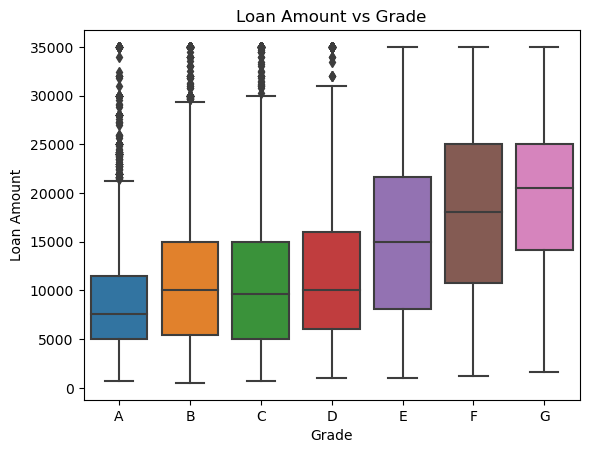

In [71]:
sns.boxplot(y=df.loan_amnt, x=df.grade, order=['A','B','C','D','E','F','G']).set(title='Loan Amount vs Grade', ylabel="Loan Amount",xlabel="Grade")
plt.show()

#### Insights 
1. Loan Grade increases with Loan Amount

#### Installment vs Income Category

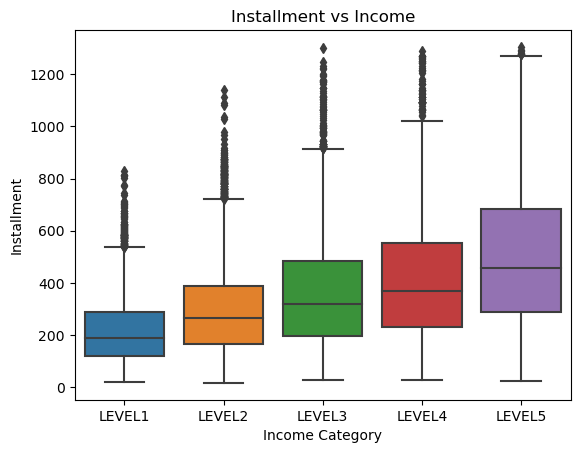

In [72]:
sns.boxplot(y=df.installment, x=df.Income_Category).set(title='Installment vs Income',xlabel="Income Category", ylabel="Installment")
plt.show()

#### Insights
1. We can see High Installments as compare to Income or Annual Income. This could be lead to more default cases.

## Multivariate Analysis
#### Multivariate analysis takes a whole host of variables into consideration. This makes it a complicated as well as essential tool. The greatest virtue of such a model is that it considers as many factors into consideration as possible. This results in tremendous reduction of bias and gives a result closest to reality. 

#### Installment vs Income Category vs Loan Status

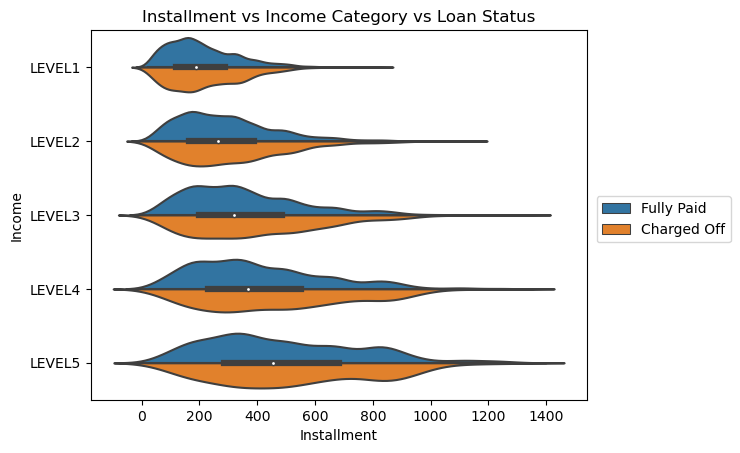

In [73]:
sns.violinplot(x=df["installment"],y=df["Income_Category"], hue=df["loan_status"],split=True).set(title="Installment vs Income Category vs Loan Status",xlabel="Installment",ylabel="Income")
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.show()

#### Insights
1. Higher installments for any Income Level have more number of defaults.

#### DTI vs Income Category vs Loan Status

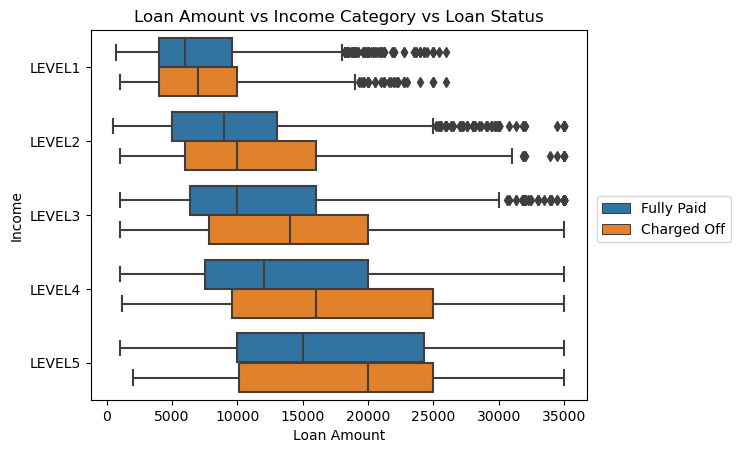

In [74]:
sns.boxplot(x=df["loan_amnt"],y=df["Income_Category"], hue=df["loan_status"]).set(title="Loan Amount vs Income Category vs Loan Status", xlabel="Loan Amount", ylabel="Income")
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.show()

#### Insights
1. Loan Amount is dependent on Annual Income. If company lends more money without considering his/her annual income, then it may results in more defaults

#### Income Category vs DTI CAT vs Loan Amount

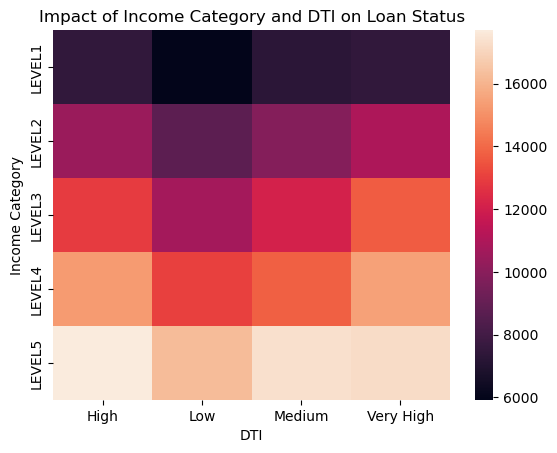

In [75]:
Income_DTI = pd.pivot_table(data=df,index='Income_Category',columns='dti_cat',values='loan_amnt')
sns.heatmap(Income_DTI).set(title="Impact of Income Category and DTI on Loan Status", xlabel="DTI", ylabel="Income Category")
plt.show()

#### Insights
1. High DTI for lower income may result in more defaults.


#### Loan Amount vs Term vs Loan Status

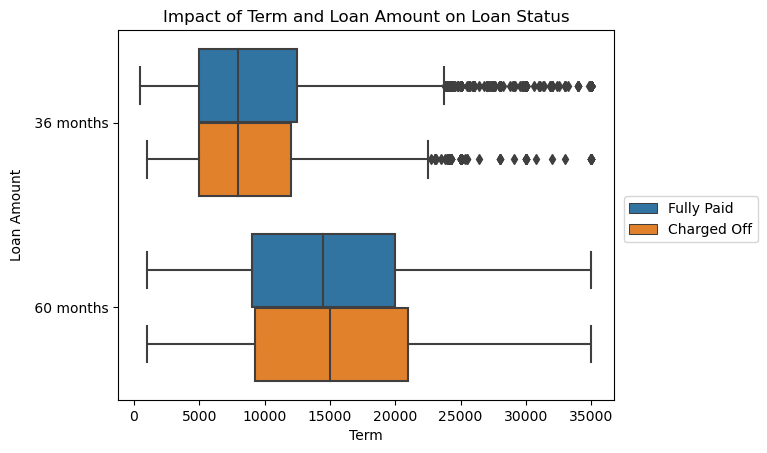

In [76]:
sns.boxplot(x=df["loan_amnt"],y=df["term"], hue=df["loan_status"]).set(title="Impact of Term and Loan Amount on Loan Status", xlabel="Term", ylabel="Loan Amount")
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.show()

#### Insights
1. Loan Term for 60 months and for high amount are more likely to go default.

#### Loan Amount vs Grade vs Loan Status

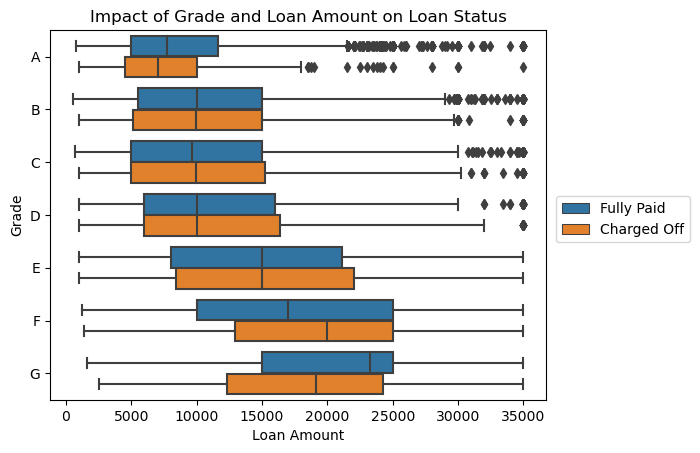

In [77]:
sns.boxplot(x=df["loan_amnt"],y=df["grade"], hue=df["loan_status"],order=['A','B','C','D','E','F','G']).set(title="Impact of Grade and Loan Amount on Loan Status", xlabel="Loan Amount", ylabel="Grade")
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.show()

#### Insights
1. High Loan Grade may result more defaults due high interest rates.

#### Purpose vs Month vs Loan Status

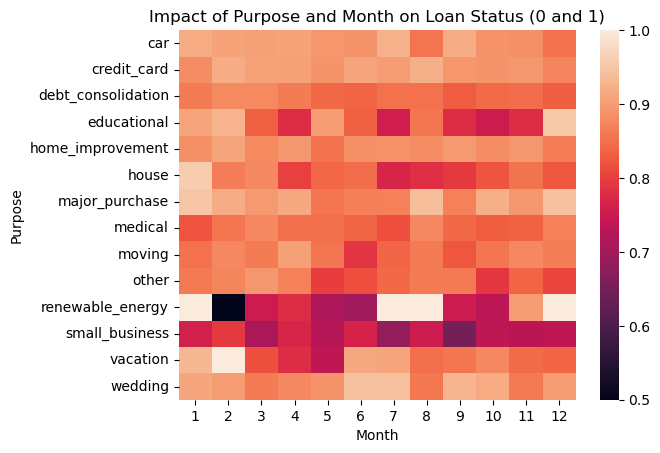

In [78]:
Purpose_Month = pd.pivot_table(data=df,index='purpose',columns=['month_num'],values='Default')
sns.heatmap(Purpose_Month).set(title="Impact of Purpose and Month on Loan Status (0 and 1)", xlabel="Month", ylabel="Purpose")
plt.show()

#### Insights
1. Loan requested for renewable_energy, small_business based on loan month are most likely driver for defaults.

#### Term vs Month vs Loan Status

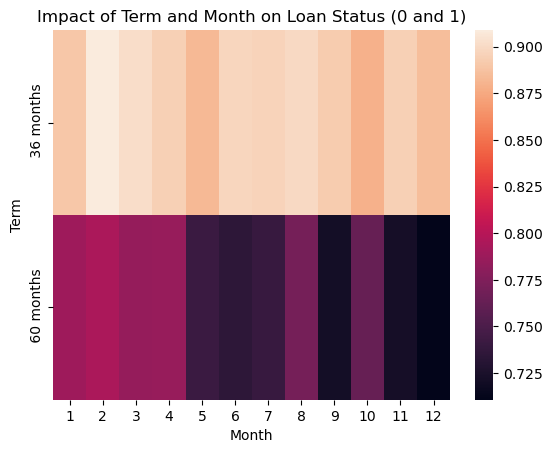

In [79]:
Term_Month = pd.pivot_table(data=df,index='term',columns=['month_num'],values='Default')
sns.heatmap(Term_Month).set(title="Impact of Term and Month on Loan Status (0 and 1)", xlabel="Month", ylabel="Term")
plt.show()

#### Insights
1. Borrowers are applying Loan for Term 60 months are more likely to defaults. Also there is relation with month of Loan Application.

#### Loan Amount vs Funded Amount vs Loan Status

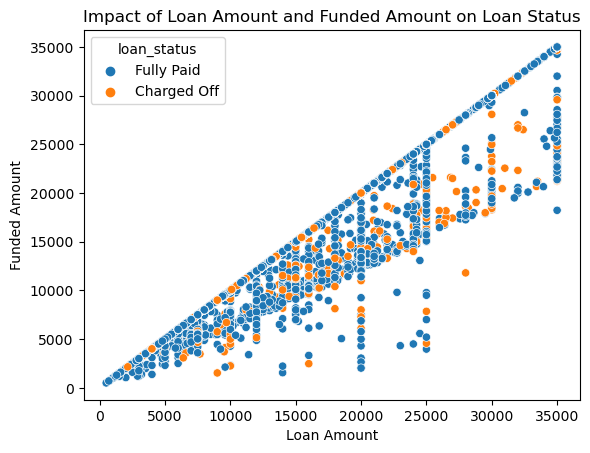

In [80]:
sns.scatterplot(x=df.loan_amnt,y=df.funded_amnt,hue=df.loan_status).set(title="Impact of Loan Amount and Funded Amount on Loan Status", xlabel="Loan Amount", ylabel="Funded Amount")
plt.show()

#### Insights
1. There is correlation between Loan Amount and Funded Amount.

#### Loan Amount vs Funded Amount Inv vs Loan Status

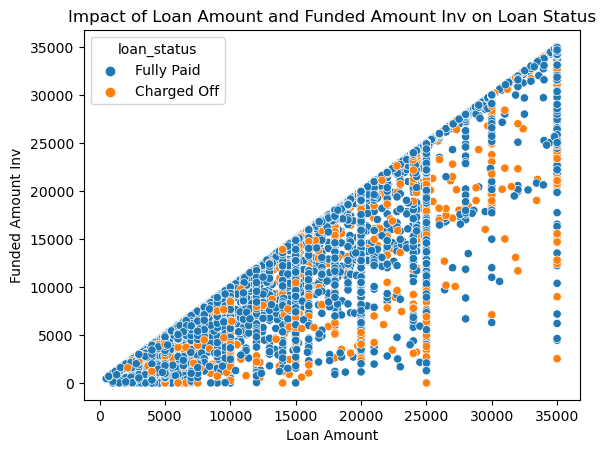

In [81]:
sns.scatterplot(x=df.loan_amnt,y=df.funded_amnt_inv,hue=df.loan_status).set(title="Impact of Loan Amount and Funded Amount Inv on Loan Status", xlabel="Loan Amount", ylabel="Funded Amount Inv")
plt.show()

#### Insights
1. There is correlation between Loan Amount and Funded Amount Investor.

#### Loan Amount vs Verification Status vs Loan Status

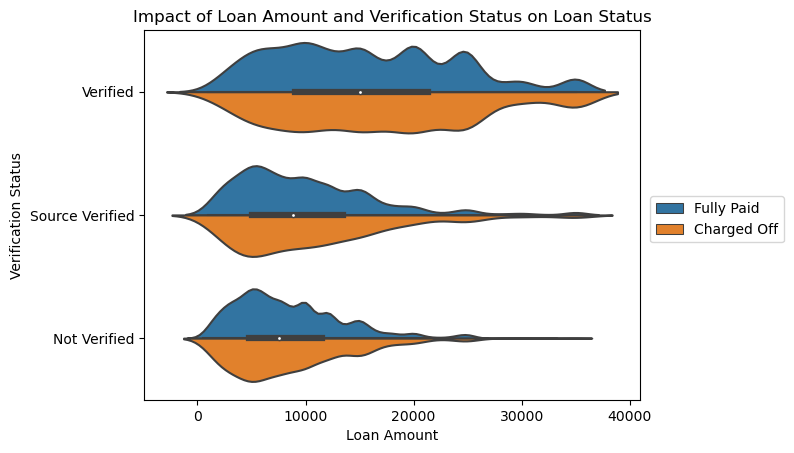

In [82]:
sns.violinplot(x=df["loan_amnt"],y=df["verification_status"], hue=df["loan_status"],split=True).set(title="Impact of Loan Amount and Verification Status on Loan Status", xlabel="Loan Amount", ylabel="Verification Status")
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.show()

#### Insights
1.As we can see more defaults for Verified Status that means something is went wrong during verification.

#### Loan Amount vs Home Ownership vs Loan Status

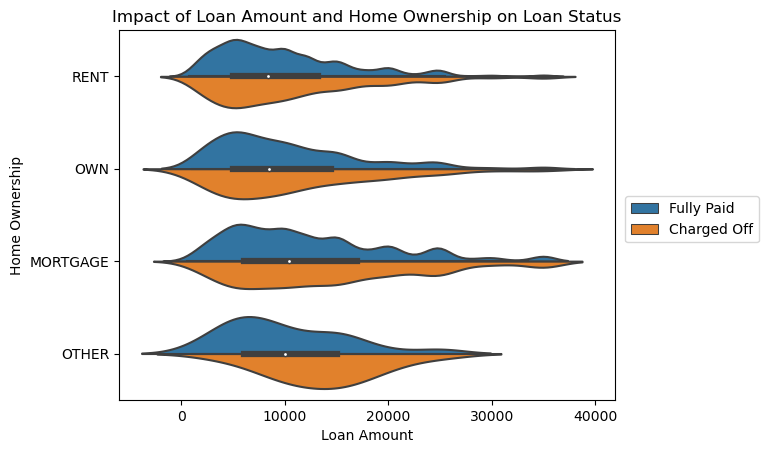

In [83]:
sns.violinplot(x=df["loan_amnt"],y=df["home_ownership"], hue=df["loan_status"],split=True).set(title="Impact of Loan Amount and Home Ownership on Loan Status", xlabel="Loan Amount", ylabel="Home Ownership")
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.show()

#### Insights
1. We can see more defaults for home ownership category OTHER.

#### Income Category vs Purpose vs Loan Status

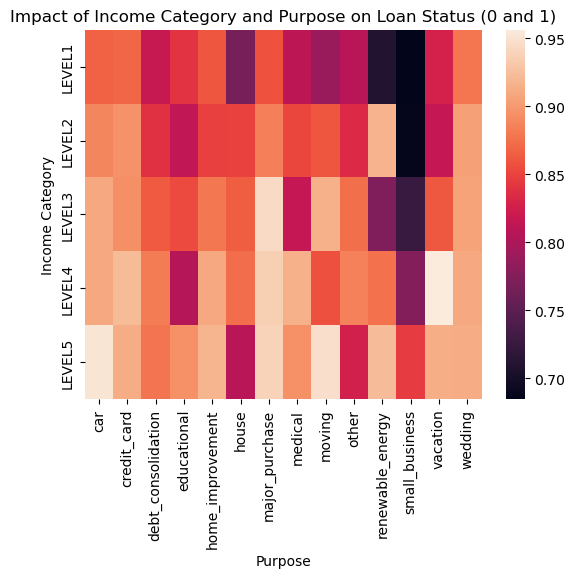

In [84]:
Income_Purpose = pd.pivot_table(data=df,index='Income_Category',columns=['purpose'],values='Default')
sns.heatmap(Income_Purpose).set(title="Impact of Income Category and Purpose on Loan Status (0 and 1)", xlabel="Purpose", ylabel="Income Category")
plt.show()

#### Insights
1. Defaults are more for lower income who are taking loan small business and renewable energy. 

#### Home Ownership vs Purpose vs Loan Status

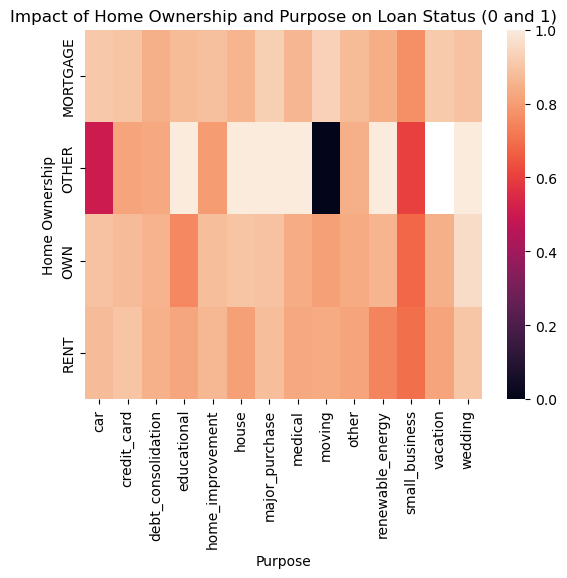

In [85]:
Home_Purpose = pd.pivot_table(data=df,index='home_ownership',columns=['purpose'],values='Default')
sns.heatmap(Home_Purpose).set(title="Impact of Home Ownership and Purpose on Loan Status (0 and 1)", xlabel="Purpose", ylabel="Home Ownership")
plt.show()

#### Insights
1. Home Ownership - OTHER and loan purpose Car, moving, small business may go on more defaults.

### Recommendations & Insights

 - There are many factors which contributes for getting loan or rejecting loan. Please find the below drivers:
     - Higher Installment 
     - Higher Loan amount 
     - Higher Debt to Income Ratio
     - Loan Issue Month
     - Higher Interest Rate
     - Loan Terms (60 months)
     - Loan Purpose (small business, renewable energy)
     - Home Ownership (other)
